In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('Pokemon.csv', index_col=0, engine='python')

In [6]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


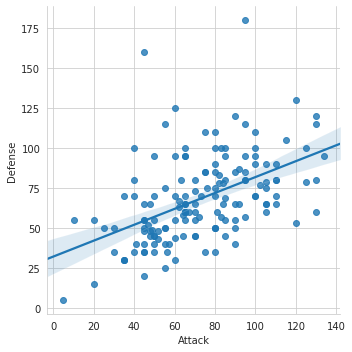

In [31]:
sns.set_style('whitegrid')
sns.lmplot(x='Attack', y='Defense', data=df)

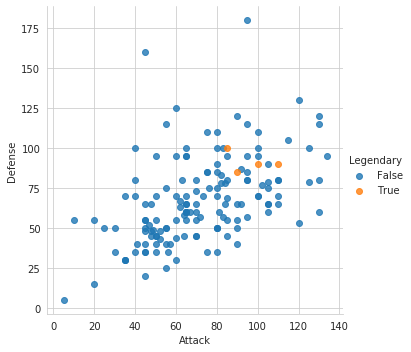

In [30]:
# remove regression line, and coloring by Legendary
sns.set_style('whitegrid')
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Legendary')

Customizing with Matplotlib

(0, 160)

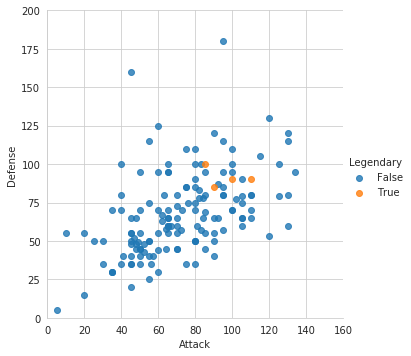

In [29]:
sns.set_style('whitegrid')
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Legendary')
plt.ylim(0,200)
plt.xlim(0,160)

BoxPlot

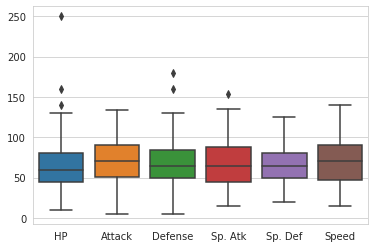

In [28]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.set_style('whitegrid')
sns.boxplot(data=stats_df)

Plotting distribution in Violin Type

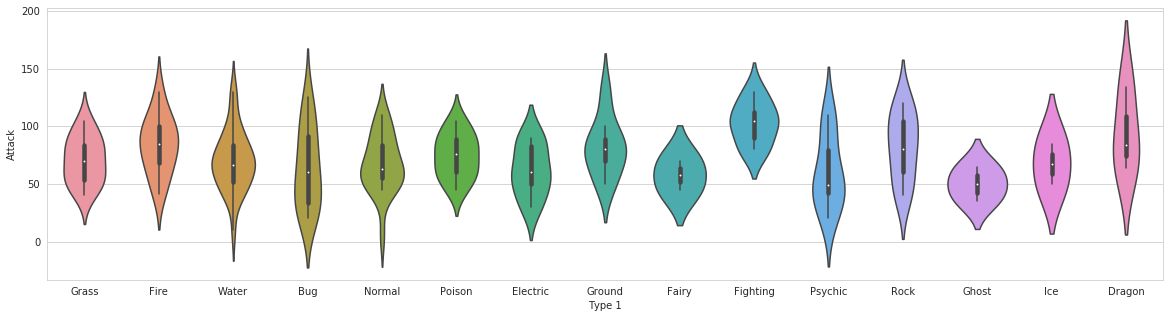

In [27]:
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
sns.violinplot(x='Type 1', y='Attack', data=df)

Add color palettes

In [32]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

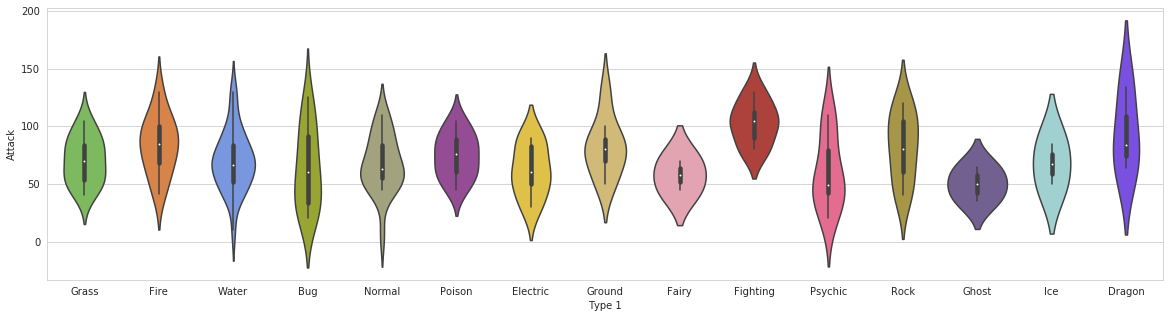

In [35]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.
That's where the swarm plot comes in.

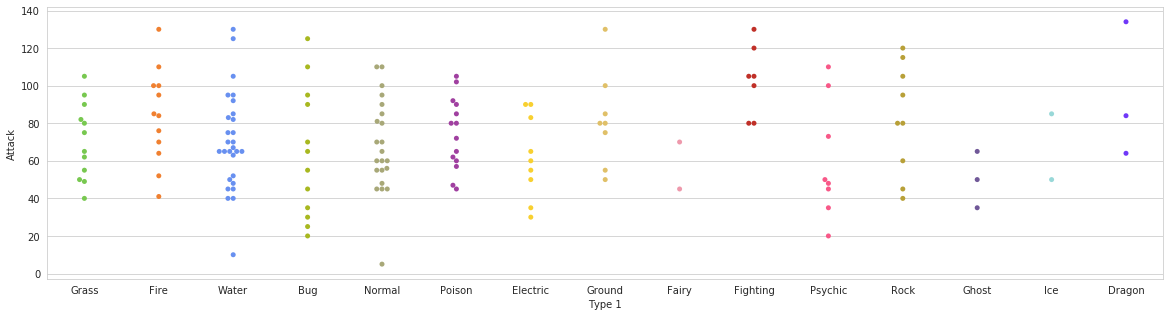

In [38]:
plt.figure(figsize=(20,5))
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

Overlaying the two plots

Text(0.5, 1.0, 'Attack type 1')

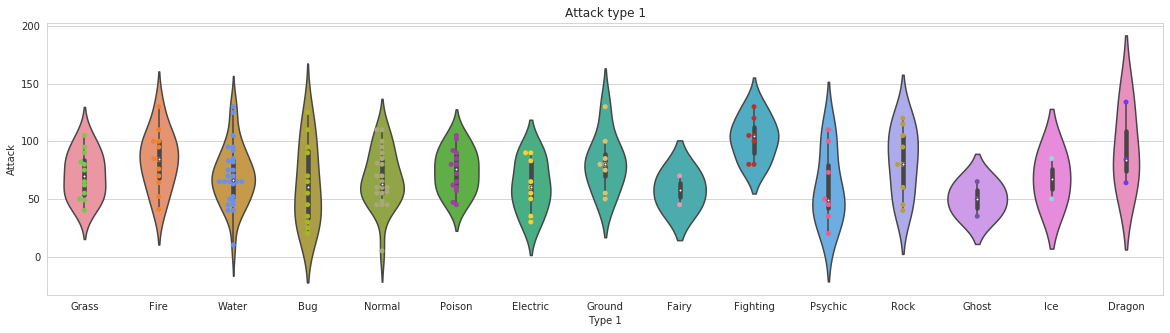

In [40]:
plt.figure(figsize=(20,5))
sns.swarmplot(x='Type 1', y='Attack',data=df, palette=pkmn_type_colors)
sns.violinplot(x='Type 1', y='Attack', data=df)
plt.title('Attack type 1')

PUTTING ALL TOGETHER

In [43]:
melted_data = pd.melt(stats_df, 
                      id_vars=['Name', 'Type 1', 'Type 2'], # keep these ids
                      var_name ='Stat' # name of melted variable
                     )
# all stats go into new column Stat
melted_data.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [48]:
print('Stats dataframe size: {} and Melted dataframe shape: {}, so melted data size is 6 times more than stats because 5 stats go to 1 stat now'.format(stats_df.shape, melted_data.shape))

Stats dataframe size: (151, 9) and Melted dataframe shape: (906, 5), so melted data size is 6 times more than stats because 5 stats go to 1 stat now


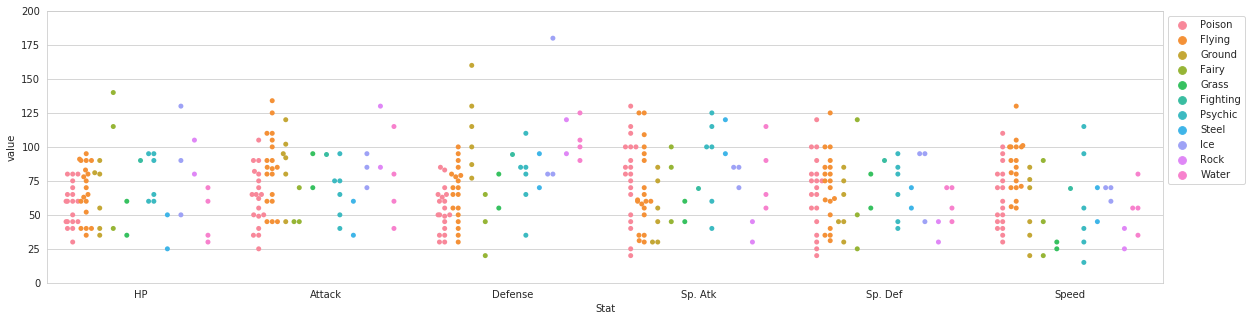

In [57]:
plt.figure(figsize=(20,5))
sns.swarmplot(x='Stat', y='value', data=melted_data, hue='Type 2', split=True) # seperate point by using split=True
plt.ylim(0, 200)
plt.legend(bbox_to_anchor=(1,1), loc=2) # locate legend box to top-right

HEATMAP

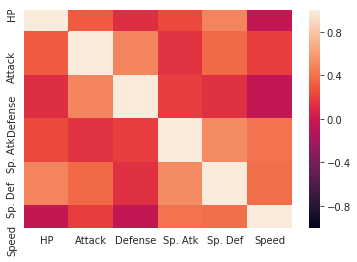

In [60]:
corr = stats_df.corr()
sns.heatmap(corr, vmin=-1.0, vmax=1.0)

HISTOGRAM

Text(0.5, 1.0, 'Defense distribution')

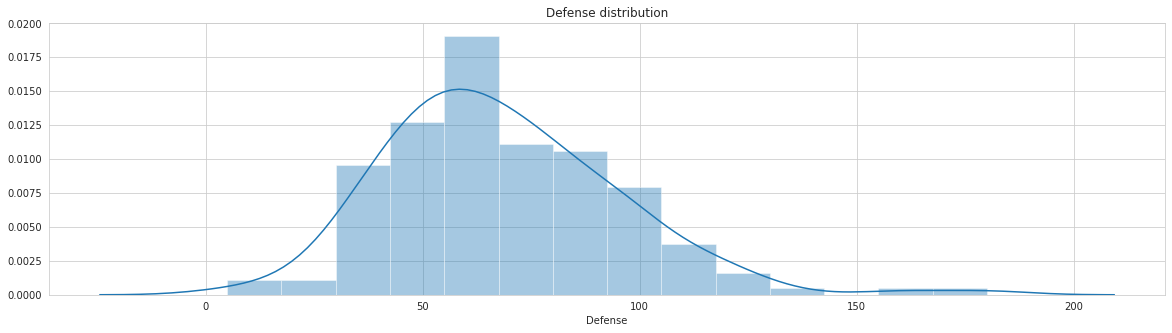

In [74]:
plt.figure(figsize=(20,5))
sns.distplot(stats_df['Defense'])
plt.title('Defense distribution')

BAR PLOT

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

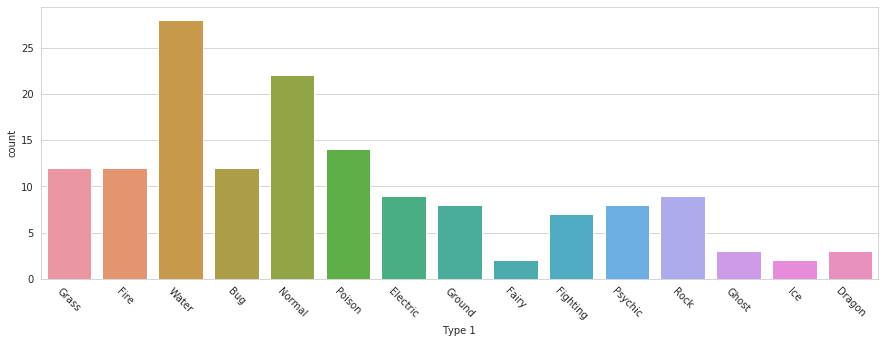

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(x='Type 1', data=stats_df)
plt.xticks(rotation=-45)